In [1]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GT_IGR/'))
sys.path.append(mp)

In [2]:
import torch
from modules import Reconstruction, Visualization, Utils, Network

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Define data set name and constraint type
dataset_name = 'key'
constraint_name = 'Eikonal'
prev_iteration = 000
iteration = 5000

In [5]:
# Load points
filename = mp + '/dataset/2d/' + dataset_name + '.vert'
dataset, normal_vectors = Utils.read_txt2(filename, device)

In [6]:
traineddata_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_iteration) + '.traineddata'
model, optimizer, scheduler = Network.load_model(traineddata_path, dimension=2, device=device)

No model found. New model created


Setting up
No previous loss value found.
Getting distance to 50th closest neighbor
Getting sampling range

Training
Iteration: 100   Loss: 1.120673656463623   Learning rate: 0.0005
Surface loss: 0.07362344115972519   Normal loss: 0.9995231032371521   Constraint: 0.47527068853378296

Iteration: 200   Loss: 1.1079860925674438   Learning rate: 0.0005
Surface loss: 0.08041809499263763   Normal loss: 0.986615002155304   Constraint: 0.40953072905540466

Iteration: 300   Loss: 1.098807454109192   Learning rate: 0.0005
Surface loss: 0.07829728722572327   Normal loss: 0.9855440855026245   Constraint: 0.3496607542037964

Iteration: 400   Loss: 1.1071499586105347   Learning rate: 0.0005
Surface loss: 0.08798157423734665   Normal loss: 0.9769576191902161   Constraint: 0.422107994556427

Iteration: 500   Loss: 1.100195050239563   Learning rate: 0.0005
Surface loss: 0.08353738486766815   Normal loss: 0.9604601860046387   Constraint: 0.5619747638702393

Iteration: 600   Loss: 1.0853372812271118   Lea

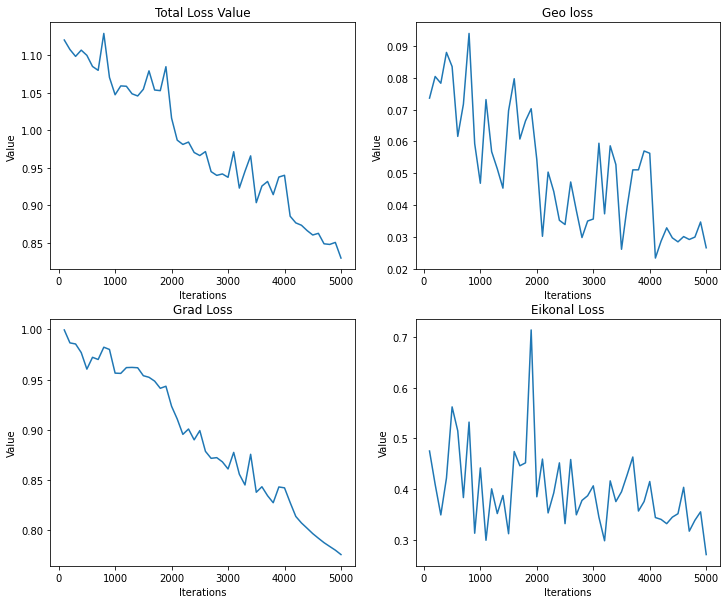

In [7]:
outfile = mp + '/figures/loss_value/' + dataset_name + '_' + constraint_name + '.npy'
model, optimizer, scheduler = Reconstruction.train(iteration,
                             model,
                             optimizer,
                             scheduler,
                             batch_size=None,
                             points=dataset,
                             normal_vectors=normal_vectors,
                             loss_output_path=outfile,
                             device=device)

In [8]:
save_path = mp + '/models/' + dataset_name + '_' + constraint_name + '_' + str(prev_iteration + iteration) + '.traineddata'
Network.save_model(save_path, model, optimizer, scheduler)

In [9]:
xx, yy= Visualization.grid_from_torch(dataset, resx=64, resy=64, device=device)

In [10]:
constraint_output = None
vtk_output_path = None
z = Visualization.nn_sampling(model, xx, yy, 
                              constraint_output=constraint_output,
                              vtk_output_path = vtk_output_path,
                              device=device)

RuntimeError: ignored

In [ ]:
Visualization.visualize2(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=True, vecfield=True, surface=True, filled_contour=True)